## TUGAS VISI KOMPUTER
## Nama : Odila Windy Astuti Halimaking
## NPM   : 06.2018.1.06993

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

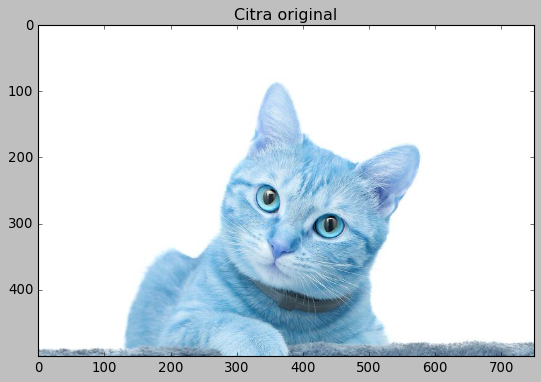

In [2]:
img = cv2.imread('kucing.jpg')
#Citra original
plt.title('Citra original')
plt.imshow(img)
plt.show()

### PROSES GRAY SCALE

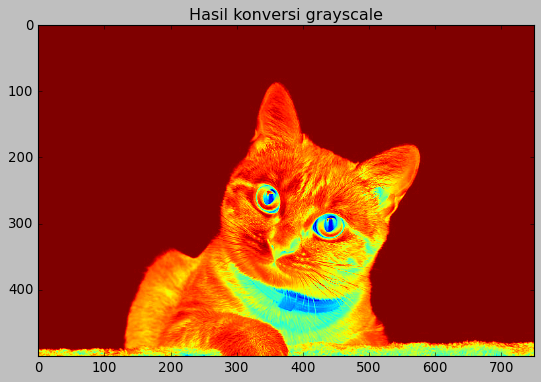

In [3]:
#Convert Gambar ke grayscale
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Konversi Gambar ke grayscale
plt.title('Hasil konversi grayscale')
plt.imshow(img2, cmap='gray')
plt.imshow(img2)
plt.show()

In [4]:
print(img2)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [174 184 174 ... 159 164 163]
 [197 192 181 ... 180 171 140]
 [200 187 181 ... 154 172 152]]


### Mencari Threshold value

In [5]:
h,w = np.shape(img2)
t0=127
t=127 #initial condition
g1 = []
g2 = []
# camel_Prewitt camel_Prewitt_X camel_Prewitt_Y
#calculating t by algorithm
while(1):
    for px in range(0,h):
        for py in range(0,w):
            if (img2[px][py] < t):
                g1.append(img2[px][py])
            else:
                g2.append(img2[px][py])
    mu1 = sum(g1) / len(g1)
    mu2 = sum(g2) / len(g2)
    t0=t
    t = ((mu1+ mu2)/2)
    delta_t = abs(t-t0)
#    print(mu1,mu2,t,delta_t)
    if(delta_t < 1):
        break
print (len(g1))
print(t)
rata2 = round(t,0)
print(rata2)

398613
199.1817497580097
199.0


### Proses Threshold

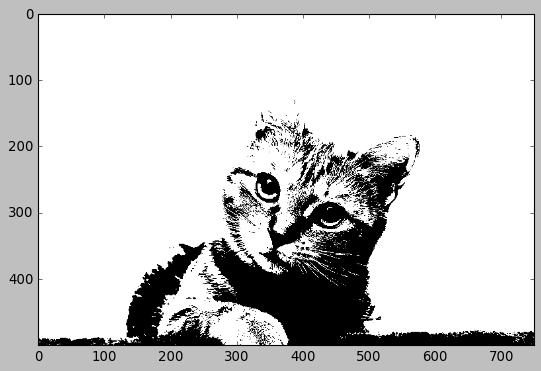

In [6]:
# thres_finder(img)
np.shape(img2)
def global_threshold(image, thres_value, val_high, val_low):
    img2 = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img2[i,j] = val_high
            else:
                img2[i,j] = val_low
    return img2

setelahnya = global_threshold(img2,t,255,0)
plt.imshow(setelahnya, cmap='gray', vmin=0, vmax=255)

### Mencari Contour

1574


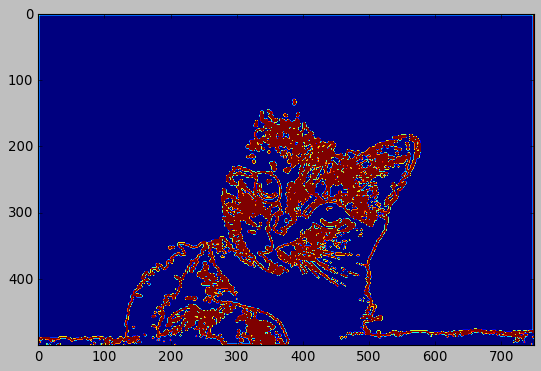

In [7]:
blank = np.zeros(setelahnya.shape, dtype='uint8')
contours, hirarki = cv2.findContours(setelahnya, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)}')
cv2.drawContours(blank, contours, -1, (255,255,255),2)
plt.imshow(blank)

In [8]:
print(setelahnya)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]]


### HASIL

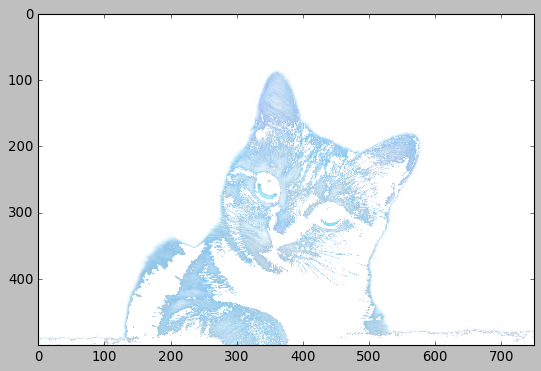

In [9]:
for i in range(len(setelahnya)):
    for j in range(len(setelahnya[0])):
        if setelahnya[i][j] != 255:
            img[i][j][0] = 255
            img[i][j][1] = 255
            img[i][j][2] = 255
            
plt.imshow(img)